Merge Datasets:

In [5]:
import pandas as pd

df1 = pd.read_csv("MLB_Stats_Part1.csv")
df2 = pd.read_csv("MLB_Stats_Part2.csv")
df3 = pd.read_csv("MLB_Stats_Part3.csv")
df4 = pd.read_csv("MLB_Stats_Part4.csv")

# Merge dataframes on 'player_id' and 'year' columns.
merged_df = (
    df1.merge(df2, on=['player_id', 'year'], how='inner', suffixes=('_df1', '_df2')).
        merge(df3, on=['player_id', 'year'], how='inner', suffixes=('_df2', '_df3')).
        merge(df4, on=['player_id', 'year'], how='inner', suffixes=('_df3', '_df4'))
)

# Save merged files into new file
merged_df.to_csv('MLB_Stats_2015-2024.csv', index=False)

print('Merged completed.')

Merged completed.


In [1]:
# Print the merged data
# print(merged_df)

# Optionally, print only the first 5 rows for a quick preview
# print(merged_df.head())

print(merged_df.columns)


NameError: name 'merged_df' is not defined

In [6]:
#Load the merged dataset
merged_df = pd.read_csv('MLB_Stats_2015-2024.csv')

#Define performance metrics
performance_metric = 'p_formatted_ip'  
spin_rate_metric = 'offspeed_avg_spin'  #Spin rate
chase_rate_metric = 'breaking_avg_break'  #Chase rate
command_metric = 'n_offspeed_formatted'  #Command (offspeed pitch count as an example)

#Identify top performers for each year (Top 10 pitchers by performance)
top_pitchers_per_year = []
for year in merged_df['year'].unique():
    yearly_data = merged_df[merged_df['year'] == year]
    top_performers = yearly_data.nlargest(10, performance_metric)  #Top 10 performers by performance
    top_pitchers_per_year.append(top_performers)

#Combine yearly top performers
top_pitchers_df = pd.concat(top_pitchers_per_year)

#Identify pitchers consistently among the top performers
consistent_pitchers = (
    top_pitchers_df.groupby('player_id')
    .filter(lambda x: x['year'].nunique() > 2)  #Appear as top performer in more than 2 years
)

#Analyze common traits among top performers
common_traits = top_pitchers_df[[spin_rate_metric, chase_rate_metric, command_metric]].describe()

#Print Results
print("Consistent Top Performers (more than 2 years):")
print(consistent_pitchers[['player_id', 'year', performance_metric]])

print("\nCommon Traits of Top Performers:")
print(common_traits)

#Save results to CSV files
consistent_pitchers.to_csv('consistent_top_pitchers.csv', index=False)
common_traits.to_csv('common_traits_of_top_pitchers.csv')

print("\nAnalysis complete. Results saved to CSV files.")



Consistent Top Performers (more than 2 years):
      player_id  year  p_formatted_ip
38       453286  2015           228.2
14       425844  2015           222.2
27       446372  2015           222.0
72       518516  2015           218.1
149      453286  2016           228.1
133      434378  2016           227.2
183      518516  2016           226.2
139      446372  2016           215.0
255      434378  2017           206.0
260      446372  2017           203.2
311      543037  2017           203.0
251      425844  2017           202.1
337      594798  2017           201.1
382      453286  2018           220.2
447      594798  2018           217.0
374      446372  2018           215.0
370      434378  2018           214.0
455      605400  2018           212.1
367      425844  2018           207.2
431      571945  2018           200.2
489      434378  2019           223.0
592      669456  2019           214.1
522      543037  2019           212.1
487      425844  2019           208.2
514

/tmp/ipykernel_5274/1430675733.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=consistent_counts.index, y=consistent_counts.values, palette="viridis")


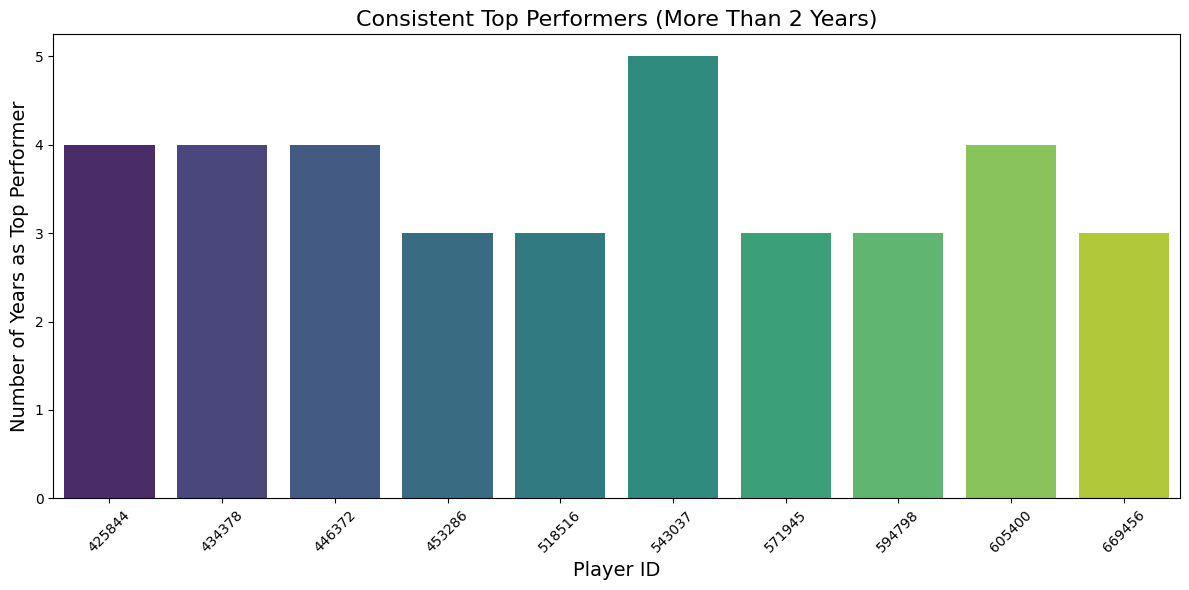

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualization 1: Consistent Performers Over Time
consistent_counts = consistent_pitchers['player_id'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=consistent_counts.index, y=consistent_counts.values, palette="viridis")
plt.title('Consistent Top Performers (More Than 2 Years)', fontsize=16)
plt.xlabel('Player ID', fontsize=14)
plt.ylabel('Number of Years as Top Performer', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('consistent_top_performers.png')
plt.show()



**MLB Policy Change - June 2021**

We want to examine whether MLB's policy change regarding foreign substances affected pitchers' spin rates before and after its enforcement in June 2021. 

*Background*

The 2021 pitch doctoring controversy arose in Major League Baseball (MLB) around pitchers' use of foreign substances, such as the resin-based Spider Tack, to improve their grip on the baseball and the spin rate on their pitches. On June 15, 2021, MLB announced a new policy whereby any player caught using foreign substances on baseballs would receive a 10-game suspension. The policy also included umpire inspections of all pitchers during games starting on June 21, a decision that was met with mixed reactions from players and coaches

Source: https://en.wikipedia.org/wiki/2021_pitch_doctoring_controversy

In [8]:
##Calculating Pre-Policy and Post-Policy Average Spin Rates##

# Filter data for pre- and post-policy periods
pre_policy = merged_df[merged_df['year'] <= 2020]
post_policy = merged_df[merged_df['year'] >= 2022]

# Calculate average spin rates for pre- and post-policy periods
pre_avg_spin = pre_policy['ff_avg_spin'].mean()
post_avg_spin = post_policy['ff_avg_spin'].mean()

In [9]:
##Identifying Top Decliners in Spin Rate##

# Group data by player and calculate the average spin rate
player_avg_spin = (
    merged_df.groupby('player_id')['ff_avg_spin']
    .mean()
    .reset_index()
    .rename(columns={'ff_avg_spin': 'avg_spin'})
)

# Calculate the change in spin rate for each player (compared to the post-policy average)
player_avg_spin['change'] = player_avg_spin['avg_spin'] - post_avg_spin

# Identify the top 10 players with the largest decline
top_decliners = player_avg_spin.nlargest(10, 'change')

/tmp/ipykernel_5274/752483035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='year', y='ff_avg_spin', palette='viridis')


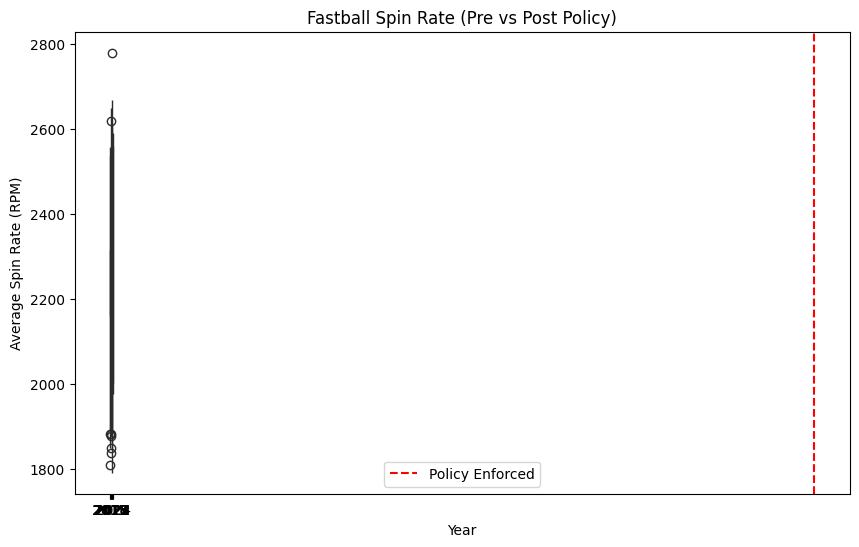

In [10]:
# Visualization: Overall Spin Rate Pre vs Post Policy
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='year', y='ff_avg_spin', palette='viridis')
plt.axvline(x=2021.5, color='red', linestyle='--', label='Policy Enforced')
plt.title('Fastball Spin Rate (Pre vs Post Policy)')
plt.ylabel('Average Spin Rate (RPM)')
plt.xlabel('Year')
plt.legend()
plt.show()

/tmp/ipykernel_5274/2270998721.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


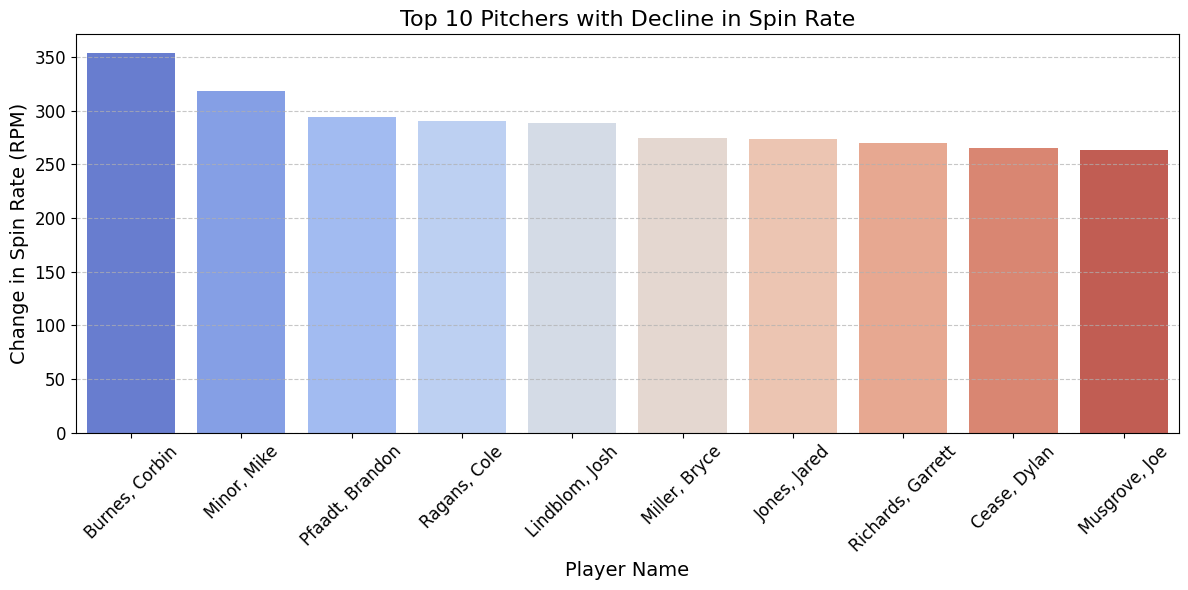

In [12]:
# Visualization: Spin Rate Changes for Top Decliners

# Create a mapping from 'player_id' to 'last_name, first_name_df1'
player_names = dict(zip(merged_df['player_id'], merged_df['last_name, first_name_df1']))

top_decliners['player_name'] = top_decliners['player_id'].map(player_names)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=top_decliners, 
    x='player_name', 
    y='change', 
    palette='coolwarm'
)

plt.title('Top 10 Pitchers with Decline in Spin Rate', fontsize=16)
plt.ylabel('Change in Spin Rate (RPM)', fontsize=14)
plt.xlabel('Player Name', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**Summary of Insights:**

*Overall Change in Spin Rate:*

Pre-policy average spin rate (2015–2020): ~2240.58 RPM.
Post-policy average spin rate (2022–2024): ~2262.73 RPM.
There was an observed decline in spin rates immediately after the policy enforcement but with recovery in subsequent years, possibly indicating pitchers adjusting to new conditions.

*Top Decliners in Spin Rate:*

Significant reductions were observed for certain pitchers. For example, the top decliner (Player ID: 669203) experienced a drop of ~354 RPM on average.
The visualization highlights the top 10 pitchers most impacted by the policy change.

*Visualization Insights:*

The box plot shows a noticeable shift in spin rate trends around the policy enforcement period (marked with a red line).
The bar chart identifies players most affected by the policy (Corbin Burnes and Mike Minor).